Linearna regresija

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

https://scikit-learn.org/stable/modules/preprocessing.html

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler

https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("../Data/Housing.csv")
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
### Mapiranje kolona koje imaju vrijednosti 'yes' i 'no'
kolone = ["mainroad", "guestroom", "basement", "hotwaterheating", "airconditioning", "prefarea"]

def funkcija_map(x):
    return x.map({"yes": 1, "no": 0})

data[kolone] = data[kolone].apply(funkcija_map)

data.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished
5,10850000,7500,3,3,1,1,0,1,0,1,2,1,semi-furnished
6,10150000,8580,4,3,4,1,0,0,0,1,2,1,semi-furnished
7,10150000,16200,5,3,2,1,0,0,0,0,0,0,unfurnished
8,9870000,8100,4,1,2,1,1,1,0,1,2,1,furnished
9,9800000,5750,3,2,4,1,1,0,0,1,1,1,unfurnished


In [4]:
### Mapiranje kolone furnishing status
status = pd.get_dummies(data["furnishingstatus"], drop_first=True)
status 

,semi-furnished,unfurnished
0,False,False
1,False,False
2,True,False
3,False,False
4,False,False
...,...,...
540,False,True
541,True,False
542,False,True
543,False,False


In [5]:
### Dodavanje nove dvije kolone na data
data = pd.concat([data, status], axis=1)
data.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,False,False
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,False,False
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,True,False
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,False,False
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,False,False
5,10850000,7500,3,3,1,1,0,1,0,1,2,1,semi-furnished,True,False
6,10150000,8580,4,3,4,1,0,0,0,1,2,1,semi-furnished,True,False
7,10150000,16200,5,3,2,1,0,0,0,0,0,0,unfurnished,False,True
8,9870000,8100,4,1,2,1,1,1,0,1,2,1,furnished,False,False
9,9800000,5750,3,2,4,1,1,0,0,1,1,1,unfurnished,False,True


In [6]:
### Brisemo kolonu furniching status
data.drop('furnishingstatus', axis=1, inplace=True)
data.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,False,False
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,False,False
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,True,False
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,False,False
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,False,False
5,10850000,7500,3,3,1,1,0,1,0,1,2,1,True,False
6,10150000,8580,4,3,4,1,0,0,0,1,2,1,True,False
7,10150000,16200,5,3,2,1,0,0,0,0,0,0,False,True
8,9870000,8100,4,1,2,1,1,1,0,1,2,1,False,False
9,9800000,5750,3,2,4,1,1,0,0,1,1,1,False,True


In [7]:
### Razdvajamo podatke na train i test skup
np.random.seed(0) # za poredenje rezultata

df_train, df_test = train_test_split(data, test_size=0.2, random_state=42) 
df_test

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
316,4060000,5900,4,2,2,0,0,1,0,0,1,0,False,True
77,6650000,6500,3,2,3,1,0,0,0,1,0,1,False,False
360,3710000,4040,2,1,1,1,0,0,0,0,0,0,True,False
90,6440000,5000,3,1,2,1,0,0,0,1,0,0,True,False
493,2800000,3960,3,1,1,1,0,0,0,0,0,0,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,True,False
357,3773000,6930,4,1,2,0,0,0,0,0,1,0,False,False
39,7910000,6000,4,2,4,1,0,0,0,1,1,0,True,False
54,7350000,6000,3,2,2,1,1,0,0,1,1,0,True,False


In [8]:
### Restartujemo indexe
df_test = df_test.reset_index(drop=True)
df_test

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,4060000,5900,4,2,2,0,0,1,0,0,1,0,False,True
1,6650000,6500,3,2,3,1,0,0,0,1,0,1,False,False
2,3710000,4040,2,1,1,1,0,0,0,0,0,0,True,False
3,6440000,5000,3,1,2,1,0,0,0,1,0,0,True,False
4,2800000,3960,3,1,1,1,0,0,0,0,0,0,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,9100000,6000,4,1,2,1,0,1,0,0,2,0,True,False
105,3773000,6930,4,1,2,0,0,0,0,0,1,0,False,False
106,7910000,6000,4,2,4,1,0,0,0,1,1,0,True,False
107,7350000,6000,3,2,2,1,1,0,0,1,1,0,True,False


In [9]:
df_train = df_train.reset_index(drop=True)
df_train

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,7525000,6000,3,2,4,1,0,0,0,1,1,0,False,False
1,6300000,7200,3,2,1,1,0,1,0,1,3,0,True,False
2,3920000,3816,2,1,1,1,0,1,0,1,2,0,False,False
3,3430000,2610,3,1,2,1,0,1,0,0,0,1,False,True
4,3010000,3750,3,1,2,1,0,0,0,0,0,0,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431,6755000,6000,4,2,4,1,0,0,0,1,0,0,False,True
432,6160000,5450,4,2,1,1,0,1,0,1,0,1,True,False
433,4340000,4500,3,2,3,1,0,0,1,0,1,0,False,False
434,3290000,4040,2,1,1,1,0,0,0,0,0,0,False,True


In [10]:
### Dataframe pretvaramo u niz
def df_to_vector(df):
    return df.iloc[:, :].values

In [11]:
y_train = np.array(df_train.pop('price'))
y_train

array([ 7525000,  6300000,  3920000,  3430000,  3010000,  4620000,
        1750000,  3010000,  2520000,  3710000,  3703000,  2450000,
        4200000,  3640000,  3640000,  5383000,  1767150,  5250000,
        3500000,  6790000,  3920000,  3920000,  5810000,  5250000,
        5950000,  3500000,  2408000,  2660000,  5285000,  3675000,
        4200000,  2275000,  3570000,  4620000,  4200000,  3087000,
        3255000,  8855000,  3640000,  7343000,  4690000,  4305000,
        3640000,  4403000,  4270000,  2940000,  4795000,  8540000,
        4235000,  7700000,  3500000,  3360000,  4970000,  3150000,
        5530000,  5880000,  3710000,  3640000,  8400000,  6083000,
        4760000,  3080000,  5243000,  7245000,  4550000,  8575000,
        8960000,  3500000,  6930000,  4613000,  4340000,  4473000,
        3780000,  6300000,  5215000,  5040000,  4515000,  8645000,
        2660000,  3118850,  2450000, 10850000,  6020000,  7560000,
        4123000,  4098500,  9100000,  7455000,  4900000,  3423

In [12]:
x_train = df_to_vector(df_train)
x_train

array([[6000, 3, 2, ..., 0, False, False],
       [7200, 3, 2, ..., 0, True, False],
       [3816, 2, 1, ..., 0, False, False],
       ...,
       [4500, 3, 2, ..., 0, False, False],
       [4040, 2, 1, ..., 0, False, True],
       [5500, 3, 2, ..., 0, True, False]], dtype=object)

In [13]:
y_test =  np.array(df_test.pop('price'))
print("y_test shape: ", y_test.shape)
x_test = df_to_vector(df_test)
print("x_test shape: ", x_test.shape)

y_test shape:  (109,)
x_test shape:  (109, 13)


Model linearne regresije

In [14]:
lm = LinearRegression()

In [15]:
lm.fit(x_train, y_train)

LinearRegression()

In [16]:
y_train_pred = lm.predict(x_train)
print(y_train_pred)

[ 7109165.83869914  6882951.80434332  4815249.78634875  3990061.64537981
  3238924.34106255  4213259.45560892  3262521.22151669  2776422.43321996
  2329025.57980947  3653860.17702972  4084008.3526849   3686745.82238177
  4686517.16289528  3873464.37706931  4190240.83409353  5869519.40313553
  2431733.1569103   5789740.18200833  3330477.18628315  7871347.1127676
  6464175.05153338  3348710.98229962  5066745.68311879  6829041.62324658
  6441622.72524019  3215327.46060841  2359612.68424143  3177203.1918561
  5577561.12144359  3119493.38199004  4101305.3259745   2612119.22569566
  3901239.29674703  5228986.06476602  4122403.48334851  4005975.25747496
  2429223.48158114  6896328.29436496  5159484.34408524  6662050.04903446
  6939841.61654545  5455918.56569498  4382276.61245578  3950285.29106801
  3778024.21928121  3318897.97407654  7075245.51564247  7975008.19676279
  4037996.59102695  7033627.71592742  3658707.03856111  3874926.73483994
  6787030.2732729   5214207.63610125  5046219.3179053

In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print(mean_absolute_error(y_train, y_train_pred))
print(mean_squared_error(y_train, y_train_pred))

719242.8936724719
968358188440.7244


In [22]:
# skaliranje standardnim skalerom
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
std_scaler.fit(x_train)

x_train_std = std_scaler.transform(x_train)
x_test_std = std_scaler.transform(x_test)

In [23]:
# feature selection pomocu RFE
from sklearn.feature_selection import RFE

num_features = x_train_std.shape[1]
train_errors = []
test_errors = []

for i in range(num_features): # i predstavlja koliko cemo njih izbaciti
    lm1 = LinearRegression()
    rfe = RFE(lm1, n_features_to_select=num_features-i)
    rfe = rfe.fit(x_train_std, y_train)

    descarded_features = np.array(df_train.columns)[np.invert(rfe.support_)]
    descarded_features_ranking = np.array(rfe.ranking_)[np.invert(rfe.support_)]
    print(descarded_features)
    print(descarded_features_ranking)

    lm2 = LinearRegression()
    lm2.fit(x_train_std[:, rfe.support_], y_train)
    
    y_train_pred = lm2.predict(x_train_std[:, rfe.support_])
    train_errors.append(mean_absolute_error(y_train, y_train_pred))

    y_test_pred = lm2.predict(x_test_std[:, rfe.support_])
    test_errors.append(mean_absolute_error(y_test, y_test_pred))
# ranking 1 je najbolji

[]
[]
['bedrooms']
[2]
['bedrooms' 'semi-furnished']
[3 2]
['bedrooms' 'guestroom' 'semi-furnished']
[4 2 3]
['bedrooms' 'mainroad' 'guestroom' 'semi-furnished']
[5 2 3 4]
['bedrooms' 'mainroad' 'guestroom' 'hotwaterheating' 'semi-furnished']
[6 3 4 2 5]
['bedrooms' 'mainroad' 'guestroom' 'hotwaterheating' 'semi-furnished'
 'unfurnished']
[7 4 5 3 6 2]
['bedrooms' 'mainroad' 'guestroom' 'hotwaterheating' 'parking'
 'semi-furnished' 'unfurnished']
[8 5 6 4 2 7 3]
['bedrooms' 'mainroad' 'guestroom' 'basement' 'hotwaterheating' 'parking'
 'semi-furnished' 'unfurnished']
[9 6 7 2 5 3 8 4]
['bedrooms' 'stories' 'mainroad' 'guestroom' 'basement' 'hotwaterheating'
 'parking' 'semi-furnished' 'unfurnished']
[10  2  7  8  3  6  4  9  5]
['bedrooms' 'stories' 'mainroad' 'guestroom' 'basement' 'hotwaterheating'
 'parking' 'prefarea' 'semi-furnished' 'unfurnished']
[11  3  8  9  4  7  5  2 10  6]
['bedrooms' 'stories' 'mainroad' 'guestroom' 'basement' 'hotwaterheating'
 'airconditioning' 'parking'

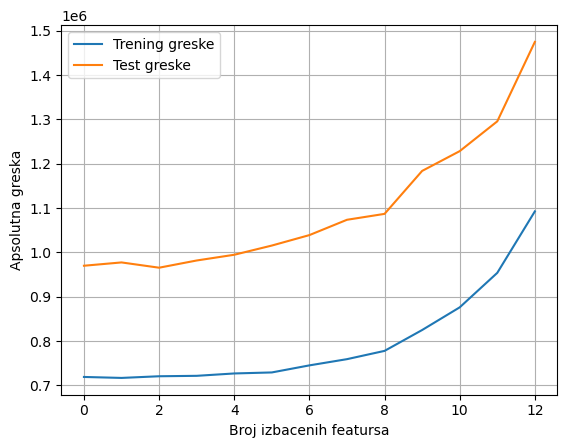

In [27]:
import matplotlib.pyplot as plt

plt.plot(train_errors, label='Trening greske')
plt.plot(test_errors, label='Test greske')

plt.xlabel('Broj izbacenih featursa')
plt.ylabel('Apsolutna greska')
plt.legend()
plt.grid()
plt.show()